In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../common')
from utils import process_group

In [2]:
avg_110, t_el, ql_dyn, ql_sta = process_group(group='E0110', 
                                              # prefix='/data/xpcs8/2022-1/babnigg202203/cluster_results_reanalysis',
                                              prefix='/home/8ididata/2022-1/babnigg202203/cluster_results_reanalysis',
                                              zone_idx='auto',
                                              num_cores=24)

2023-11-24 11:17:07,503 utils                   : total number of files in E0110  is 1196
2023-11-24 11:18:04,343 utils                   : label='E0110_section_00': remove 17 datasets out of 120
2023-11-24 11:18:04,352 utils                   : label='E0110_section_03': remove 15 datasets out of 120
2023-11-24 11:18:04,349 utils                   : label='E0110_section_02': remove 14 datasets out of 120
2023-11-24 11:18:04,443 utils                   : label='E0110_section_04': remove 14 datasets out of 120
2023-11-24 11:18:04,477 utils                   : label='E0110_section_05': remove 16 datasets out of 120
2023-11-24 11:18:04,484 utils                   : label='E0110_section_06': remove 16 datasets out of 119
2023-11-24 11:18:04,624 utils                   : label='E0110_section_01': remove 13 datasets out of 120
2023-11-24 11:18:04,632 utils                   : label='E0110_section_07': remove 12 datasets out of 119
2023-11-24 11:18:04,639 utils                   : label='E0110

In [3]:
avg_111, _, _, _ = process_group(group='E0111', 
                                 prefix='/home/8ididata/2022-1/babnigg202203/cluster_results_reanalysis',
                                 zone_idx='auto',
                                 num_cores=24)

2023-11-24 11:18:05,647 utils                   : total number of files in E0111  is 1197
2023-11-24 11:19:02,582 utils                   : label='E0111_section_00': remove 14 datasets out of 120
2023-11-24 11:19:02,589 utils                   : label='E0111_section_01': remove 14 datasets out of 120
2023-11-24 11:19:02,600 utils                   : label='E0111_section_02': remove 15 datasets out of 120
2023-11-24 11:19:02,702 utils                   : label='E0111_section_03': remove 14 datasets out of 120
2023-11-24 11:19:02,746 utils                   : label='E0111_section_04': remove 14 datasets out of 120
2023-11-24 11:19:02,758 utils                   : label='E0111_section_08': remove 17 datasets out of 119
2023-11-24 11:19:02,821 utils                   : label='E0111_section_05': remove 16 datasets out of 120
2023-11-24 11:19:02,856 utils                   : label='E0111_section_06': remove 15 datasets out of 120
2023-11-24 11:19:02,992 utils                   : label='E0111

In [4]:
plt.rcParams['pdf.fonttype'] = 42
# plt.rcParams['font.sans-serif'] = 'Helvetica'   # not installed on tanzanite
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.size'] = 6
plt.rcParams['figure.dpi'] = 300

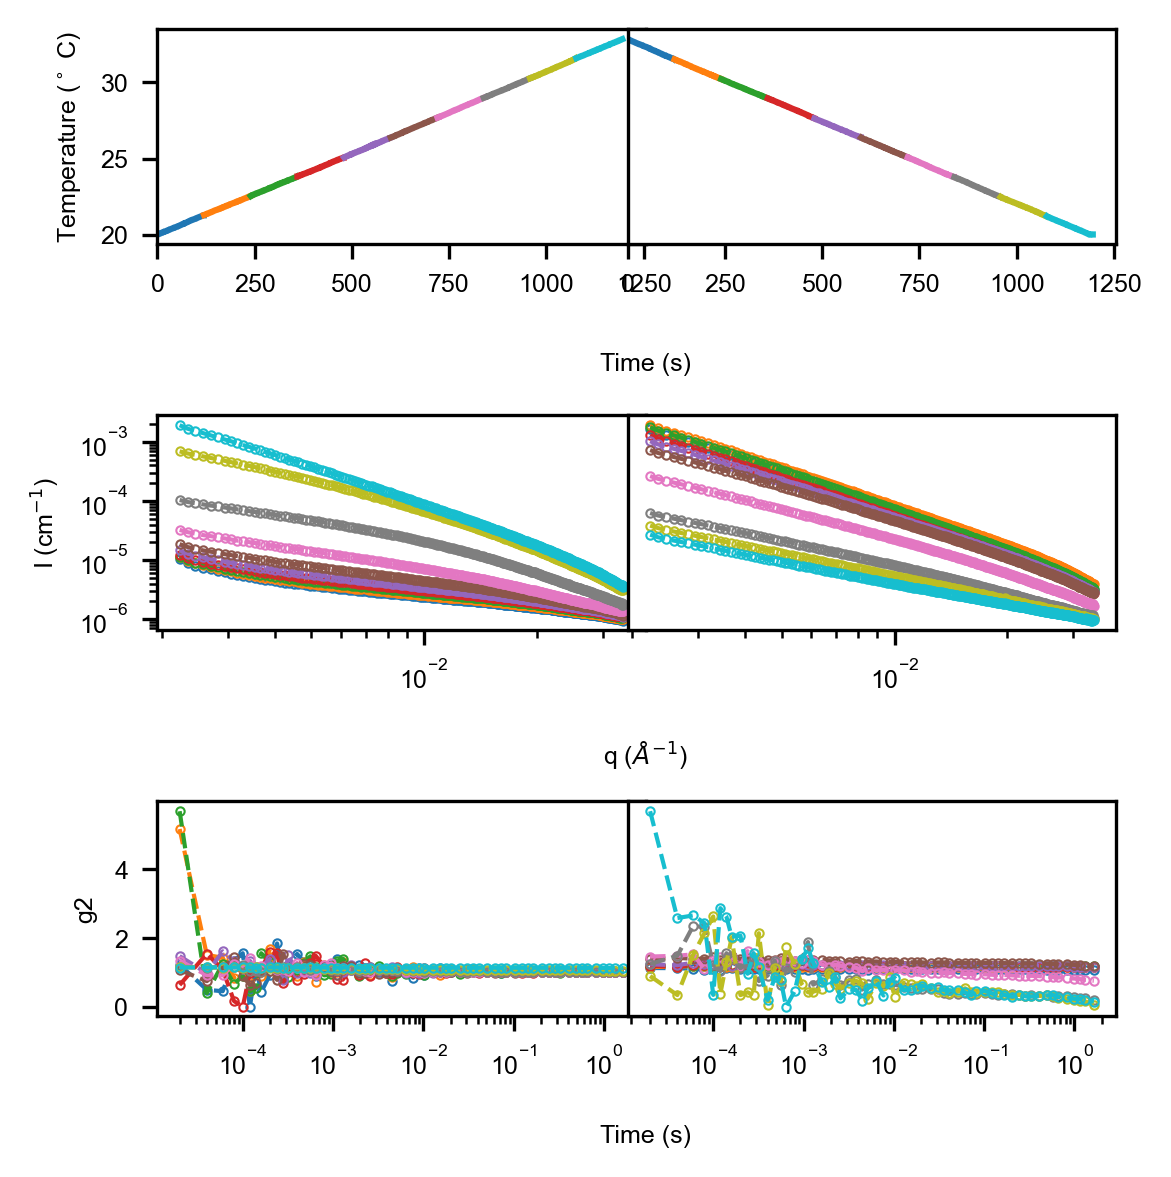

In [5]:
fig, ax = plt.subplots(3, 2, figsize=(3.8, 4.0))
for n in range(3):
    ax[n, 1].get_yaxis().set_visible(False)
    # ax[n, 0].xaxis.set_label_coords(0.9, -0.25)

def plot_one_column(ax, avg_data_list, omit_label=False, g2_idx=0):
    for avg_dict in avg_data_list:
        ax[0].plot(avg_dict['temperature_x'], avg_dict['temperature'])
        
        # have to remove the last few points
        ax[1].loglog(ql_sta[:-4], avg_dict['saxs_1d'][:-4], 'o--', lw=1, ms=2, mew=0.5, mfc='none')
        
        # x = np.
        ax[2].plot(t_el, avg_dict['g2'][:, g2_idx], 'o--', lw=1, ms=2, mew=0.5, mfc='none')
    
    if not omit_label:
        ax[0].set_ylabel('Temperature ($^\circ$ C)')
        ax[1].set_ylabel('I (cm$^{-1}$)')
        ax[2].set_ylabel('g2')

        ax[0].set_xlabel('Time (s)')
        ax[1].set_xlabel('q ($\\AA^{-1}$)')
        ax[2].set_xlabel('Time (s)')
        ax[0].xaxis.set_label_coords(1.0, -0.5)
        ax[1].xaxis.set_label_coords(1.0, -0.5)
        ax[2].xaxis.set_label_coords(1.0, -0.5)

    # additional setup
    ax[0].set_xlim(0, None)
    ax[2].set_xscale('log')
        
plot_one_column(ax[:, 0], avg_110)
plot_one_column(ax[:, 1], avg_111, omit_label=True)
 
plt.tight_layout(w_pad=-1, h_pad=0.125)
plt.savefig('figure3.png', dpi=300)
# plt.savefig('figure2.pdf')
# plt.tight_layout()

In [6]:
print(t_el)

[0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.001 0.001 0.001 0.001 0.001 0.001 0.002 0.002 0.002 0.003
 0.003 0.004 0.004 0.005 0.006 0.008 0.009 0.01  0.013 0.015 0.018 0.02
 0.026 0.031 0.036 0.041 0.051 0.061 0.072 0.082 0.102 0.123 0.143 0.164
 0.205 0.246 0.287 0.328 0.41  0.492 0.573 0.655 0.819 0.983 1.147 1.311
 1.638]
